In [3]:
:dep burn = {version = "0.12.1", features = ["ndarray", "wgpu", "candle"]}

In [4]:
:show_deps

burn = {version = "0.12.1", features = ["ndarray", "wgpu", "candle"]}


In [57]:
use burn::backend::{NdArray};
use burn::tensor::{Tensor};
use burn::tensor::backend::Backend;

## 1、实现sigmoid function
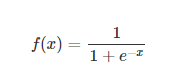
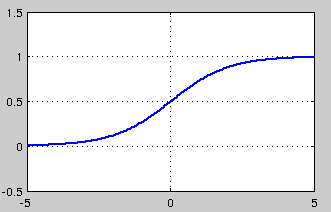

In [58]:
use burn::tensor::backend::Backend;

fn basic_sigmoid<B: Backend, const D: usize>(x: Tensor<B, D>) -> Tensor<B, D> {
    let ones = x.ones_like();
    return ones.clone() / (ones.clone() + (-x).exp());
}

In [59]:
let device = Default::default();
let tensor_1 = Tensor::<NdArray, 1>::from_data([-100f32, -10f32, -1f32, 0f32, 1f32, 10f32, 100f32], &device);

let result_tensor = basic_sigmoid::<NdArray, 1>(tensor_1.clone());
println!("{}", result_tensor);

Tensor {
  data:
[0.0, 4.5397872e-5, 0.26894143, 0.5, 0.7310586, 0.9999546, 1.0],
  shape:  [7],
  device:  Cpu,
  backend:  "ndarray",
  kind:  "Float",
  dtype:  "f32",
}


## 2、实现Sigmoid gradient（梯度）
完成sigmoid的梯度函数，用它去计算sigmoid相对于其输入x的梯度
$\sigma'(x) =\sigma(x)(1-\sigma(x))$

In [60]:
fn sigmoid_derivative<B: Backend, const D: usize>(x: Tensor<B, D>) -> Tensor<B, D> {
    let ones = x.ones_like();
    let sigmoid = basic_sigmoid(x);

    return sigmoid.clone()*(ones.clone() - sigmoid.clone());
}

In [61]:
let ds: Tensor::<NdArray, 1> = sigmoid_derivative::<NdArray, 1>(tensor_1.clone());
println!("{}", ds);

Tensor {
  data:
[0.0, 4.539581e-5, 0.19661194, 0.25, 0.19661193, 4.5416677e-5, 0.0],
  shape:  [7],
  device:  Cpu,
  backend:  "ndarray",
  kind:  "Float",
  dtype:  "f32",
}
